In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, normalize
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
tf.__version__

'2.6.0'

In [2]:
train_df = pd.read_csv(os.path.join('data', 'unionTrain.csv'))
test_df = pd.read_csv(os.path.join('data', 'unionTest.csv'))

In [3]:
X_train, y_train = train_df.drop(['Severity', 'sequence_id'], axis=1), train_df['Severity']
X_test, y_test = test_df.drop(['Severity', 'sequence_id'], axis=1), test_df['Severity']

In [7]:
scaler_name = 'RobustScaler.pkl'
scaler = joblib.load(os.path.join('saved_scaler', scaler_name))

In [4]:
model_name = 'trained_model_at_2022-10-14_14-09-34.h5'
model = load_model(os.path.join('saved_models', model_name))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 854, 100)          40400     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 854, 50)           25200     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50)                15200     
_________________________________________________________________
dense (Dense)                (None, 2)                 102       
Total params: 80,902
Trainable params: 80,902
Non-trainable params: 0
_________________________________________________________________


In [12]:
X_test_scaled = scaler.transform(X_test)
def modify_X(x):
    result = x.copy()
    result = result.reshape(-1, 21350//25, 50)
    return result
def modify_y(df):
    result = pd.get_dummies(df)
    result = result.to_numpy()
    return result

X_test_modified = modify_X(X_test_scaled)
y_test_modified = modify_y(y_test)

In [13]:
len(X_test_modified), len(y_test_modified)

(19, 19)

In [15]:
test_predict = model.predict(X_test_modified)
test_real_predict = np.argmax(test_predict, axis=1)+1
# for i in range(len(y_test)):
#     print(f"Index:{i}, Predict:{test_real_predict[i]}, Real:{y_test[i]}")

f1: 0.4000000000000001
accuracy: 0.6842105263157895
              precision    recall  f1-score   support

           1       0.40      0.40      0.40         5
           2       0.79      0.79      0.79        14

    accuracy                           0.68        19
   macro avg       0.59      0.59      0.59        19
weighted avg       0.68      0.68      0.68        19

----------------------------------------------


<AxesSubplot:>

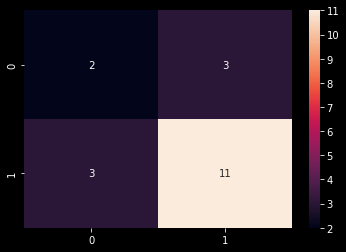

In [16]:
f1_test = f1_score(y_test, test_real_predict)
accuracy_test = accuracy_score(y_test, test_real_predict)
print(f"f1: {f1_test}\naccuracy: {accuracy_test}")
print(classification_report(y_test, test_real_predict))
print("----------------------------------------------")
sns.heatmap(confusion_matrix(y_test, test_real_predict),annot = True,fmt = '2.0f')